In [1]:
import pandas as pd
import numpy as ns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Uber Request Data1.csv")

In [3]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/07/2016 11:51:00,11/07/2016 13:00:00
1,867,Airport,1.0,Trip Completed,11/07/2016 17:57:00,11/07/2016 18:47:00
2,1807,City,1.0,Trip Completed,12/07/2016 09:17:00,12/07/2016 09:58:00
3,2532,Airport,1.0,Trip Completed,12/07/2016 21:08:00,12/07/2016 22:03:00
4,3112,City,1.0,Trip Completed,13/07/2016 08:33:16,13/07/2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15/07/2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15/07/2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15/07/2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15/07/2016 23:54:39,NaN


In [5]:
!pip install ydata_profiling

Defaulting to user installation because normal site-packages is not writeable


In [6]:
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder , StandardScaler
%matplotlib inline

In [7]:
df.shape

(6745, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [10]:
#Generate the profile Report
report= ProfileReport(df)
#Save the report to a file
report.to_file("df_profile_report.html")
#Alternatively i can also display the report directly
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.47it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
print(df[['Request timestamp','Drop timestamp']].isnull().sum())

Request timestamp       0
Drop timestamp       3914
dtype: int64


<Figure size 600x400 with 0 Axes>

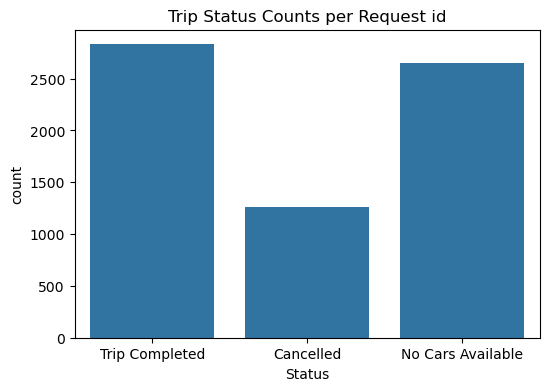

In [20]:
# Bar Chart: Count of status per Request id
plt.figure(figsize=(6,4))
sns.countplot(x='Status', data=df)
plt.title('Trip Status Counts per Request id')
plt.show()

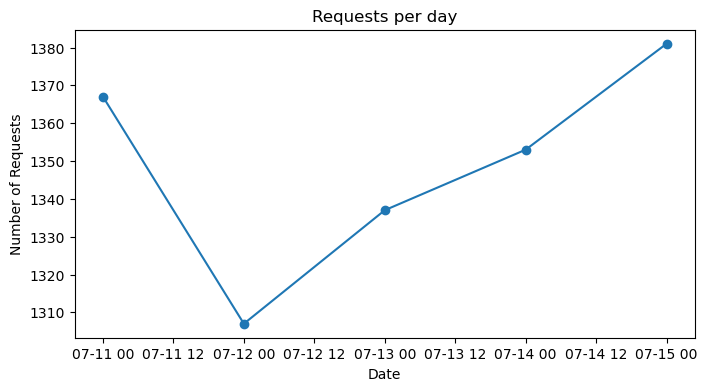

In [43]:
# Time series: Requests over time(daily)
daily= df['Request timestamp'].dt.date.value_counts().sort_index()
daily.plot(kind='line', marker= 'o', figsize=(8,4), title='Requests per day')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.show()

In [23]:
# Convert to datetime format
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True)

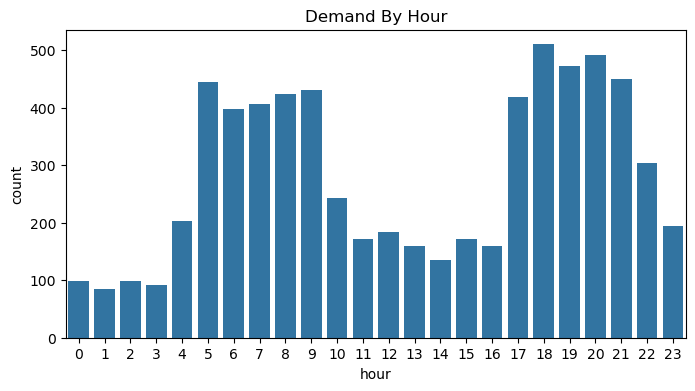

In [28]:
# Demand over time(hourly)
df['hour']= df['Request timestamp'].dt.hour
plt.figure(figsize=(8,4))
sns.countplot(x='hour', data=df)
plt.title('Demand By Hour')
plt.show()

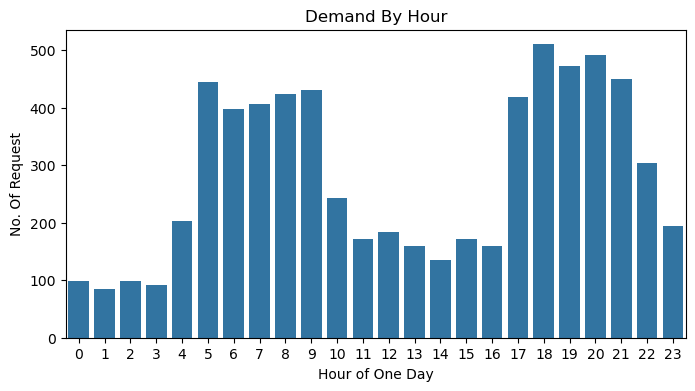

In [25]:
df['hour']= df['Request timestamp'].dt.hour
plt.figure(figsize=(8,4))
sns.countplot(x='hour', data=df)
plt.title('Demand By Hour')
plt.xlabel('Hour of One Day')
plt.ylabel('No. Of Request')
plt.show()

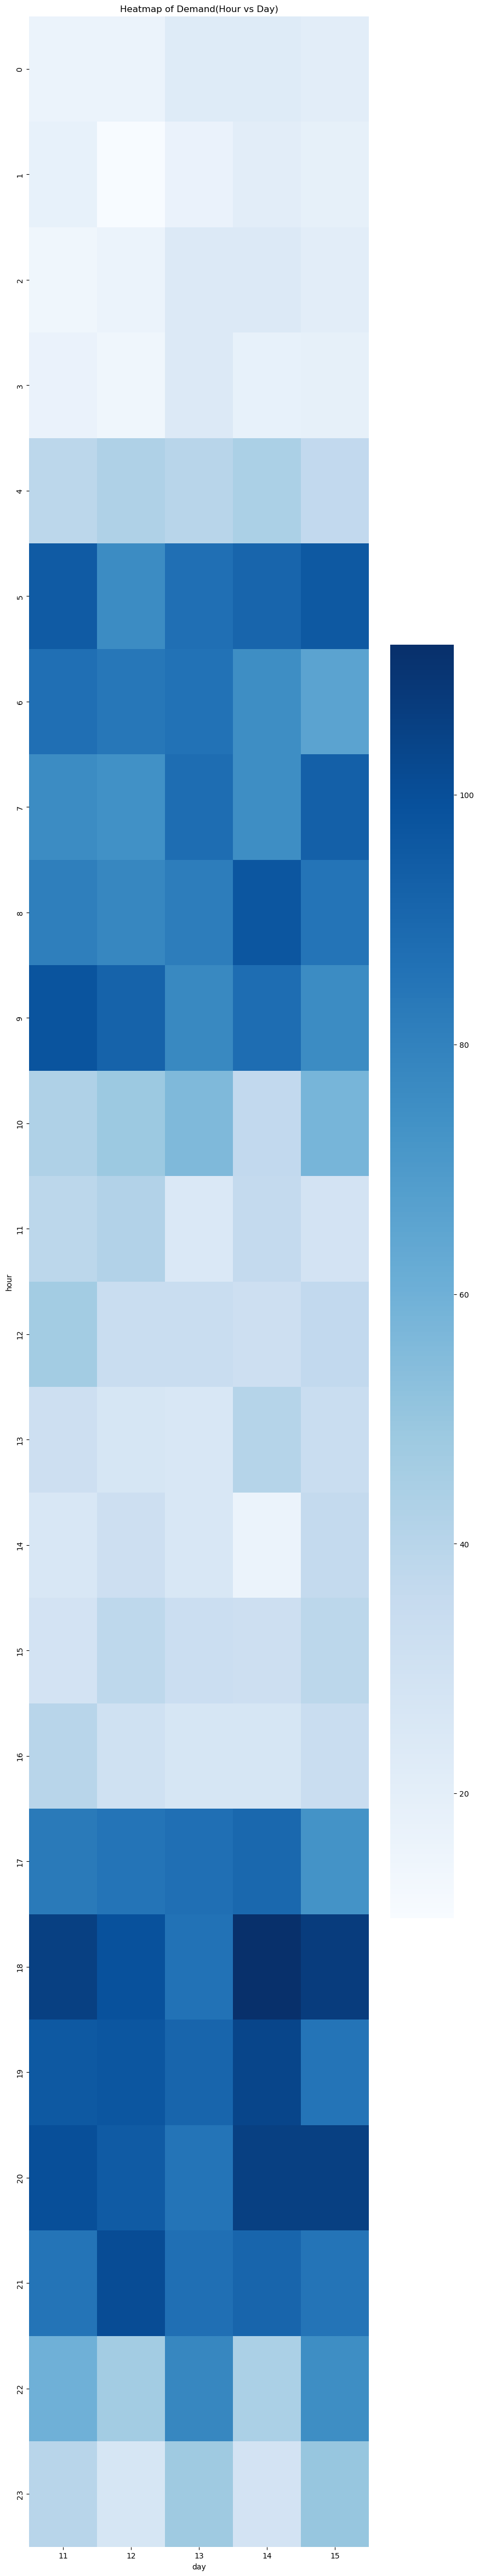

In [33]:
# Heatmap: Demand by hour and day
df['day']=df['Request timestamp'].dt.day
pivot= df.pivot_table(index='hour', columns='day', values='Request id', aggfunc='count')
plt.figure(figsize=(10,60))
sns.heatmap(pivot, cmap='Blues')
plt.title('Heatmap of Demand(Hour vs Day)')
plt.show()

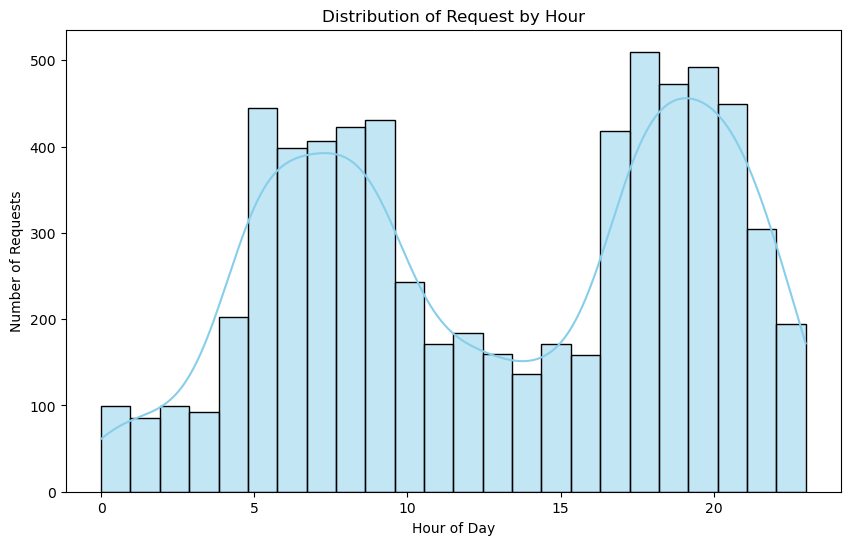

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x= 'hour', kde=True, bins=24, color='Skyblue')
plt.title('Distribution of Request by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.show()

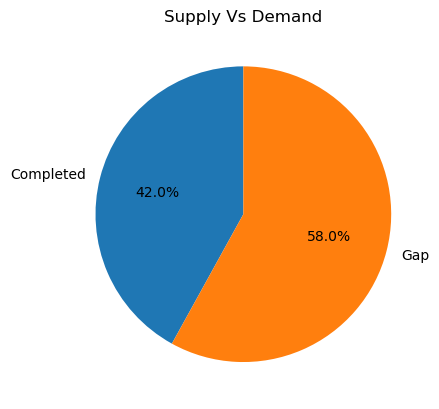

In [38]:
#Pie Chart for Supply vs Demand(Completed vs All Request)
total_requests= len(df)
completed= len(df[df['Status']== 'Trip Completed'])
plt.pie([completed, total_requests - completed], labels = ['Completed','Gap'], autopct='%1.1f%%', startangle=90)
plt.title('Supply Vs Demand')
plt.show()

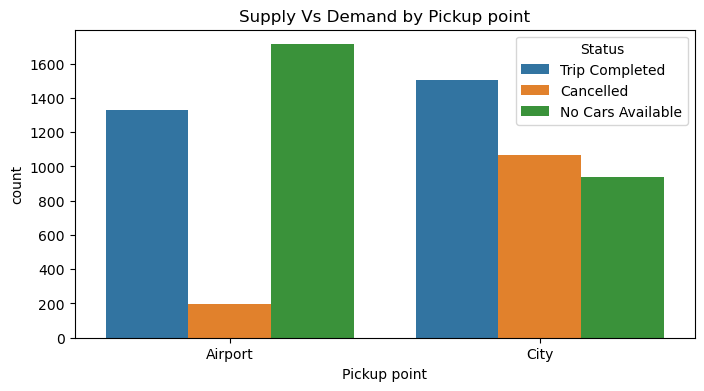

In [39]:
# Bar Chart for Supply demand based on Pickup Point
plt.figure(figsize=(8,4))
sns.countplot(x='Pickup point', hue='Status', data=df)
plt.title('Supply Vs Demand by Pickup point')
plt.show()

# Solution to business objective

#### 1. Incentivize Drivers During Low Supply Hours

###1.Offer bonuses or surge pricing for early morning and late-night shifts.

#####Provide performance incentives for drivers who maintain low cancellation rates during those hours.

### 2. Dynamic Shift Scheduling

####Use data to predict high-demand, low-supply hours and actively encourage driver availability then.

### 3. Driver Recruitment Focus
Recruit more part-time or night-shift drivers in high-demand areas (e.g., near airports and city zones).

# Conclusion:
By implementing these recommendations, Uber can reduce cancellations, increase ride fulfillment rates, and ultimately improve customer satisfaction and business growth.